In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Reading and loading the Data

In [35]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [28]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


creditcard information

In [29]:
credit_card_data.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [61]:
credit_card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

checking the null values

In [56]:
new_data=credit_card_data.dropna(axis=0,how='any') #dropping the null rowss from the dataset

In [57]:
new_data.isnull().values.any() # after dropping the null rows there is no row with null values

False

In [62]:
new_data.isna().sum()  # all zeros means there no null values row

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [60]:
len(credit_card_data[credit_card_data['Class']==0]) #finding the length of the valid transactions

7947

In [63]:
len(credit_card_data[credit_card_data['Class']==1]) #finding the length of the invalid transactions

25

by above lengths we can cleary say that this data very bias and imbalanced,so we need to balance the data

In [65]:
new_data['Class'].value_counts() #just find no_of_transactions

0.0    7947
1.0      25
Name: Class, dtype: int64

In [80]:
X = new_data.iloc[: , :-1].values #splitting the dataset
Y = new_data.iloc[: , -1].values

In [82]:
X.shape

(7972, 30)

In [84]:
Y.shape

(7972,)

In [86]:
#convert imbalanced data to balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res , y_res = ros.fit_resample(X,Y)


In [88]:
x_res.shape

(15894, 30)

In [90]:
y_res.shape #now both are balanced now

(15894,)

In [92]:
from collections import Counter
print(Counter(Y))
print(Counter(y_res))  # we can clearly see that data is balanced
     

Counter({0.0: 7947, 1.0: 25})
Counter({0.0: 7947, 1.0: 7947})


Split the data into Training data & Testing Data

In [94]:

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)

In [96]:
x_train.shape

(11125, 30)

In [97]:
x_test.shape

(4769, 30)

Model Training

In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [101]:

y_pred = classifier.predict(x_test) #prediction
 

Model Evaluation

In [103]:

n_errors = (y_pred != y_test).sum()

In [105]:
n_errors

0

In [107]:
y_test.shape

(4769,)

1.0


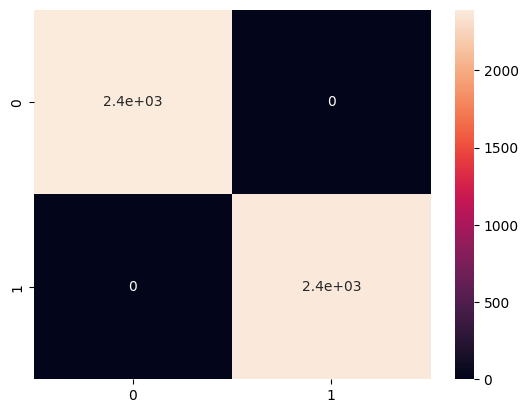

In [109]:

from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [110]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

1.0

Overall model evalution


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2393
         1.0       1.00      1.00      1.00      2376

    accuracy                           1.00      4769
   macro avg       1.00      1.00      1.00      4769
weighted avg       1.00      1.00      1.00      4769

